In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('means.csv', sep=';')

In [25]:
data.iloc[3,0] = 'HSR-RAN-GloVe'
data.iloc[7,0] = 'GP-GN-GloVe'

In [26]:
data = data.sort_values(by=['MEAN'])

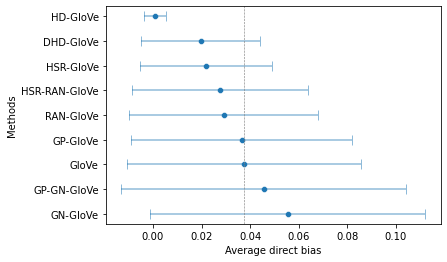

In [27]:
ax = sns.scatterplot(x="MEAN", y="METHODS", data=data)
plt.axvline(x=0.0375,linestyle ="--", linewidth=0.6, color = 'gray')
plt.errorbar(data['MEAN'], data['METHODS'], xerr = data['SE'], fmt = 'none', capsize=5, alpha=0.5)
plt.xlabel("Average direct bias")
plt.ylabel("Methods")
plt.savefig('means.png', bbox_inches='tight')
plt.show()

In [20]:
orig = pd.read_csv('../RAN-Debias-master/Gender-Biased Word Relation Task/source/bias_bef.csv')
RAN = pd.read_csv('../RAN-Debias-master/Gender-Biased Word Relation Task/source/bias_RAN.csv')
GP = pd.read_csv('../gp_debias-master/Gender-Biased Word Relation Task/source/bias_GP.csv')
GNGP = pd.read_csv('../gp_debias-master/Gender-Biased Word Relation Task/source/bias_GNGP.csv')
GN = pd.read_csv('../gn_glove-master/Gender-Biased Word Relation Task/source/bias_GN.csv')
HSR = pd.read_csv('../GenderBiasHSR-master/Gender-Biased Word Relation Task/source/bias_HSR.csv')
HSRAN = pd.read_csv('../GenderBiasHSR-master/Gender-Biased Word Relation Task/bias_HSR-RAN.csv')
DHD = pd.read_csv('../Double-Hard-Debias-master/Gender-Biased Word Relation Task/source/bias_DHD.csv')
HD = pd.read_csv('../debiaswe-master/Gender-Biased Word Relation Task/bias_HD.csv')


In [76]:
import numpy as np

In [87]:
np.mean(np.abs(HSR.iloc[:,1]))

0.021763303960462728

In [37]:
import scipy.stats as stats

In [57]:
stats.ttest_ind(GNGP.iloc[:,1], GP.iloc[:,1])

Ttest_indResult(statistic=-38.15228734247828, pvalue=0.0)

In [73]:
print('orig')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], orig.iloc[:,1]))
print('RAN')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], RAN.iloc[:,1]))
print('GP')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], GP.iloc[:,1]))
print('GNGP')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], GNGP.iloc[:,1]))
print('GN')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], GN.iloc[:,1]))
print('HSR')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], HSR.iloc[:,1]))
print('HSRAN')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], HSRAN.iloc[:,1]))
print('DHD')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], DHD.iloc[:,1]))
print('HD')
for methods in [orig, RAN, GP, GNGP, GN, HSR, HSRAN, DHD, HD]:
    print(stats.ttest_rel(methods.iloc[:,1], HD.iloc[:,1]))

orig
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=-6.2120516575081925, pvalue=5.272788656374161e-10)
Ttest_relResult(statistic=16.19343552553697, pvalue=8.05671380566474e-59)
Ttest_relResult(statistic=-23.241930416670815, pvalue=7.877439953796465e-119)
Ttest_relResult(statistic=93.24099000151342, pvalue=0.0)
Ttest_relResult(statistic=1.9472065214198189, pvalue=0.05151584084731672)
Ttest_relResult(statistic=2.0397561616343585, pvalue=0.04138011617357304)
Ttest_relResult(statistic=-2.534000908188849, pvalue=0.01128001610046688)
Ttest_relResult(statistic=-23.714336465532988, pvalue=1.336478403823208e-123)
RAN
Ttest_relResult(statistic=6.2120516575081925, pvalue=5.272788656374161e-10)
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=21.323260189597338, pvalue=2.0370580197400008e-100)
Ttest_relResult(statistic=-22.17112356117402, pvalue=2.3075691998974487e-108)
Ttest_relResult(statistic=103.85794851436633, pvalue=0.0)
Ttest_relResult(statistic=6.4

HSR average bias is not statistically different from the original glove at 0.05

DHD, HSRAN at 0.01

DHD is not different at 0.05 from RAN glove

HSR and HSRAN are not different at 0.01

In [94]:
#compute mean and sd
def summary_direct(bias):
    print('avg: ', np.mean(bias), 'sd: ', np.std(bias))
    
#select male and female biases
def gen_bias(gender_bias):
    male = []
    female = []
    for word in gender_bias.iloc[:,1]:
        if word>0:
            male.append(word)
        else:
            female.append(word)
    return male, female     
male_bef, female_bef = gen_bias(orig)
male_RAN, female_RAN = gen_bias(RAN)
male_HSR, female_HSR = gen_bias(HSR)
male_GP, female_GP = gen_bias(GP)
male_GN, female_GN = gen_bias(GN)
male_GNGP, female_GNGP = gen_bias(GNGP)
male_HD, female_HD = gen_bias(HD)
male_DHD, female_DHD = gen_bias(DHD)
male_HSRAN, female_HSRAN = gen_bias(HSRAN)

In [100]:
print(stats.ttest_ind(male_bef, female_bef))
print(stats.ttest_ind(male_RAN, female_RAN))
print(stats.ttest_ind(male_HSR, female_HSR))
print(stats.ttest_ind(male_HSRAN, female_HSRAN))
print(stats.ttest_ind(male_GP, female_GP))
print(stats.ttest_ind(male_HD, female_HD))
print(stats.ttest_ind(male_GN, female_GN))
print(stats.ttest_ind(male_GNGP, female_GNGP))
print(stats.ttest_ind(male_DHD, female_DHD))

Ttest_indResult(statistic=263.82095837872487, pvalue=0.0)
Ttest_indResult(statistic=240.8155337109325, pvalue=0.0)
Ttest_indResult(statistic=265.83194488225377, pvalue=0.0)
Ttest_indResult(statistic=246.7650216804221, pvalue=0.0)
Ttest_indResult(statistic=268.5414003788801, pvalue=0.0)
Ttest_indResult(statistic=40.69132967902309, pvalue=0.0)
Ttest_indResult(statistic=251.02321797866847, pvalue=0.0)
Ttest_indResult(statistic=269.9394103264517, pvalue=0.0)
Ttest_indResult(statistic=268.3811574108329, pvalue=0.0)
